In [3]:
from packages import * #Import packages in packages file
from functions import * #Import functions from functions file
import matplotlib.ticker as mticker
%matplotlib inline

In [4]:
from scipy.stats import expon

In [22]:
#Function which calculates empirical cumulative distribution
def ecdf_points(data):
    L=len(data)
    data_array=[]
    for i in range(L):
        data_array.append(data[i])
    np.asarray(data_array,float)
    x=np.sort(data_array)
    y=np.arange(0,1,1/L)
    X=[x[0]]
    Y=[y[0]]
    for i in range(0,L-1):
        if(x[i]!=x[i+1]):
            X.append(x[i+1])
            Y.append(y[i+1])
    X=np.asarray(X,float)
    Y=np.asarray(Y,float)
    return X,Y

    
def tail(x):
    x_ecdf,y_ecdf=ecdf_points(x)
    Y_ecdf=1-y_ecdf
    return x_ecdf, Y_ecdf  

# Exponential Distribution
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [40]:

N=1000
s=100
x_range=np.arange(0,N,0.1)
exp_pdf=expon.pdf(x,scale=s)
exp_cdf=expon.cdf(x,scale=s)
exp_tail=1-exp_cdf

exp_randoms = expon.rvs(size=1000,scale=s)

x_exp_ecdf,y_exp_ecdf=tail(exp_randoms)


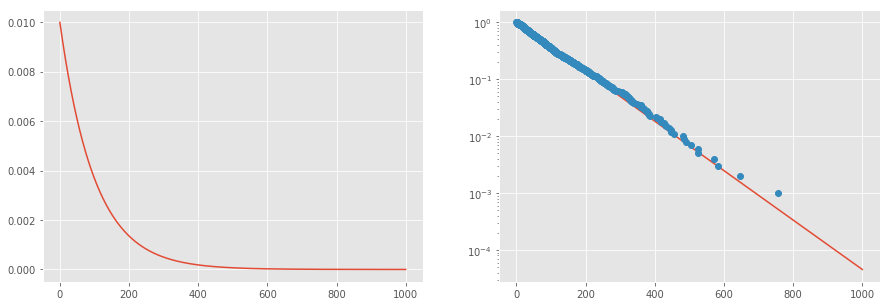

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range,exp_pdf)

plt.subplot(122)
plt.semilogy(x_range,exp_tail)
plt.semilogy(x_exp_ecdf,y_exp_ecdf,'o')

# Pareto Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html

In [31]:
from scipy.stats import pareto

In [87]:
N=100
x_range=np.arange(1,N,0.1)
b=1
#a=100

pareto_pdf=pareto.pdf(x_range,b)
pareto_cdf=pareto.cdf(x_range,b)
pareto_tail=1-pareto_cdf

pareto_randoms=pareto.rvs(b,size=1000)

x_pareto_ecdf,y_pareto_ecdf=tail(pareto_randoms)

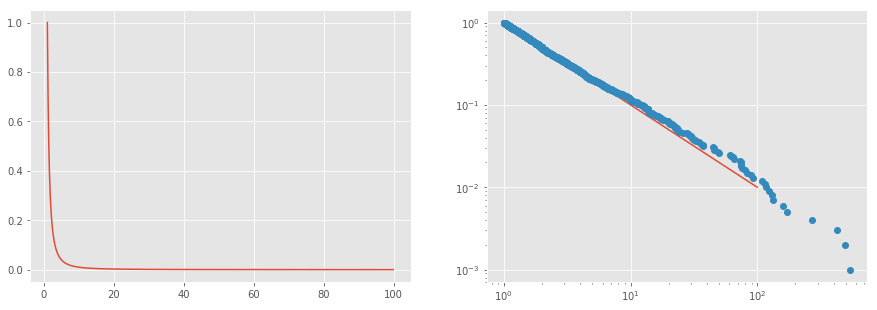

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range,pareto_pdf)

plt.subplot(122)
plt.loglog(x_range,pareto_tail)
plt.loglog(x_pareto_ecdf,y_pareto_ecdf,'o')

# Gamma Distribution
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gamma.html

In [68]:
from scipy.stats import gamma

In [123]:
a=10
scale=0.00001
N=100
x_range=np.arange(1,N,0.1)

gamma_pdf=gamma.pdf(x_range,a,scale)
gamma_cdf=gamma.cdf(x_range,a,scale)
gamma_tail=1-gamma_cdf

gamma_randoms=gamma.rvs(a,scale,size=10000)

x_gamma_ecdf,y_gamma_ecdf=tail(gamma_randoms)

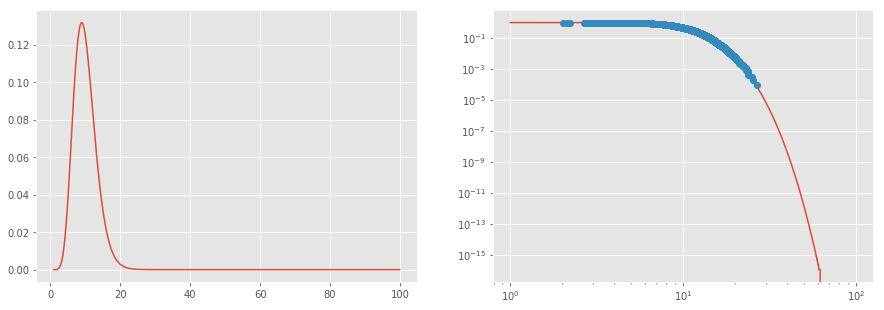

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range,gamma_pdf)

plt.subplot(122)
plt.loglog(x_range,gamma_tail)
plt.loglog(x_gamma_ecdf,y_gamma_ecdf,'o')

# Log-normal

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html

In [125]:
from scipy.stats import lognorm

In [178]:
s=2
scale=0.1
N=1000

x_range=np.arange(0.1,N,0.1)

lognorm_pdf=lognorm.pdf(x_range,s,scale)
lognorm_cdf=lognorm.cdf(x_range,s,scale)
lognorm_tail=1-lognorm_cdf

lognorm_randoms=lognorm.rvs(s,scale,size=10000)

x_lognorm_ecdf,y_lognorm_ecdf=tail(lognorm_randoms)

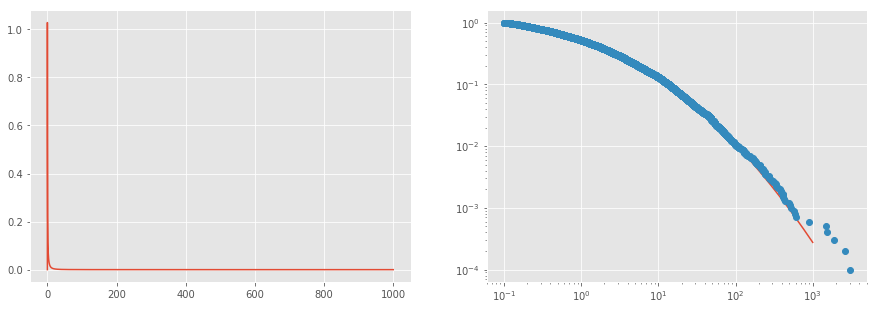

In [179]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range,lognorm_pdf)

plt.subplot(122)
plt.loglog(x_range,lognorm_tail)
plt.loglog(x_lognorm_ecdf,y_lognorm_ecdf,'o')

# Mittag-Leffler

https://github.com/khinsen/mittag-leffler

In [183]:
from mittag_leffler import ml

In [268]:
a1=0.2
a2=0.5
N=1000
tau=2
x_range=np.arange(0.1,N,0.1)


tail_ml1=ml(-x_range,a1)
tail_ml2=ml(-x_range,a2)

# def ml_pdf(x,a):
#     f=a*ml(-x,a-1)
#     return f

# f=ml_pdf(x_range,a1)

In [269]:
# plt.plot(x_range,f)

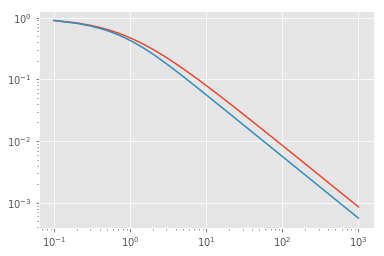

In [270]:
plt.loglog(x_range,tail_ml1)
plt.loglog(x_range,tail_ml2)